In [4]:
# Verificando se o pacote watermark está instalado
try:
    import watermark
except ImportError:
    # Se o pacote não estiver instalado, instalamos automaticamente
    print("Pacote 'watermark' não encontrado. Instalando...")
    !pip install watermark
    import watermark  # Tentamos importar novamente após a instalação

# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf  # Versões dos Pacotes e do Python.

# Carregando a extensão watermark para mostrar as versões
%reload_ext watermark
%watermark --iversions --python


Pacote 'watermark' não encontrado. Instalando...
Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.25.0

seaborn    : 0.13.2
statsmodels: 0.14.2
json       : 2.0.9
pandas     : 2.2.2
numpy      : 1.26.4
watermark  : 2.5.0
matplotlib : 3.8.4



# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [6]:
# Tratamento dos Dados e Amostragem.
tips = sns.load_dataset('tips')
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']
tips = tips[tips['tip_pct'] < .5]
tips.drop(['total_bill', 'sex', 'smoker', 'day', 'time', 'size'], axis=1, inplace=True)
tips.head()

,tip,net_bill,tip_pct
0,1.01,15.98,0.063204
1,1.66,8.68,0.191244
2,3.50,17.51,0.199886
3,3.31,20.37,0.162494
4,3.61,20.98,0.172069


<Axes: xlabel='net_bill', ylabel='tip_pct'>

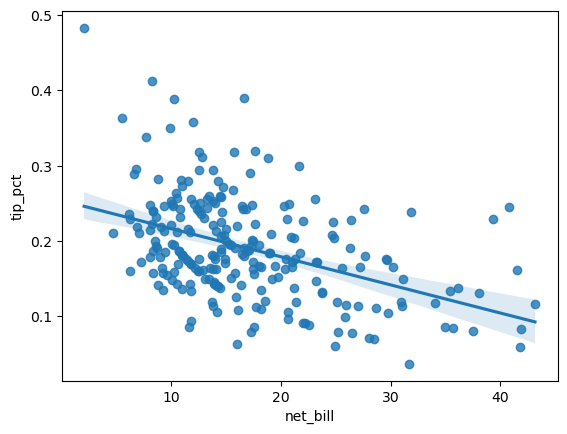

In [8]:
# Gráfico de dispersão 'net_bill' x 'tip_pct'.
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [11]:
# Regressão reg1 ('tip_pct ~ np.log(net_bill)').
reg1 = smf.ols('tip_pct ~ np.log(net_bill)',
               data=tips).fit()

#Criando a variável de resíduo1.
tips['res1'] = reg1.resid

# Sumário reg1.
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     68.11
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           1.03e-14
Time:                        20:15:33   Log-Likelihood:                 336.29
No. Observations:                 242   AIC:                            -668.6
Df Residuals:                     240   BIC:                            -661.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3818      0.023     16.261      0.000       0.336       0.428
np.log(net_bill)    -0.0702      0.009     -8.253      0.000      -0.087      -0.053
==============================================================================
Omnibus:                       15.660   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.845
Skew:                           0.631   Prob(JB):                     0.000220
Kurtosis:                       3.280   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

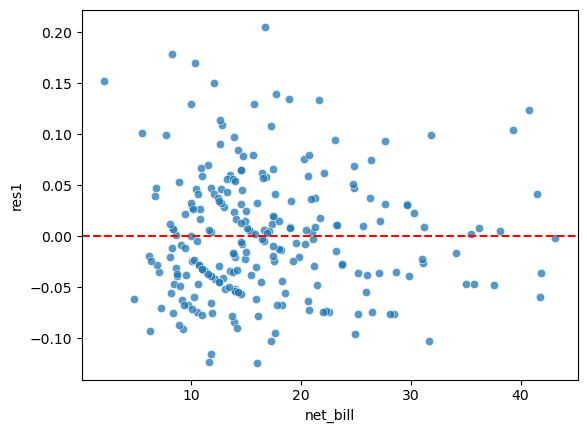

In [13]:
#Análise de resíduo1.
sns.scatterplot(x = 'net_bill', y = 'res1', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [16]:
# Regressão reg2 ('tip_pct ~ net_bill + np.power(net_bill,2)').
reg2 = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)',
               data=tips).fit()

#Criando a variável de resíduo2.
tips['res2'] = reg2.resid

# Sumário reg2.
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     30.98
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           1.09e-12
Time:                        20:15:45   Log-Likelihood:                 333.96
No. Observations:                 242   AIC:                            -661.9
Df Residuals:                     239   BIC:                            -651.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2932      0.020     14.668      0.000       0.254       0.333
net_bill                 -0.0082      0.002     -3.961      0.000      -0.012      -0.004
np.power(net_bill, 2)     0.0001   4.67e-05      2.223      0.027    1.18e-05       0.000
==============================================================================
Omnibus:                       19.830   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.215
Skew:                           0.696   Prob(JB):                     1.50e-05
Kurtosis:                       3.514   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

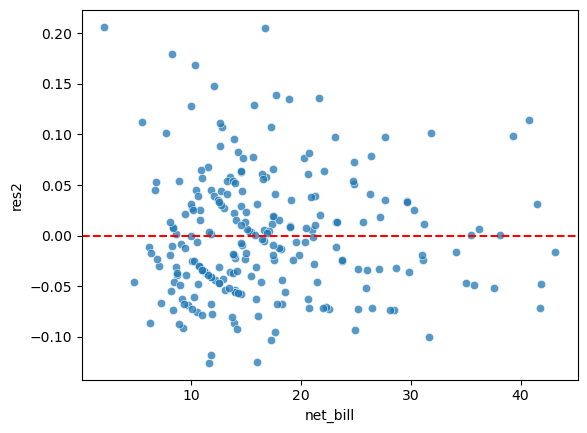

In [18]:
#Análise de resíduo2.
sns.scatterplot(x = 'net_bill', y = 'res2', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [21]:
# Regressão reg3 ('np.log(tip_pct) ~ net_bill').
reg3 = smf.ols('np.log(tip_pct) ~ net_bill',
               data=tips).fit()

#Criando a variável de resíduo3.
tips['res3'] = reg3.resid

# Sumário reg3.
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     69.62
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           5.70e-15
Time:                        20:15:57   Log-Likelihood:                -81.349
No. Observations:                 242   AIC:                             166.7
Df Residuals:                     240   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3383      0.051    -26.095      0.000      -1.439      -1.237
net_bill      -0.0229      0.003     -8.344      0.000      -0.028      -0.018
==============================================================================
Omnibus:                        8.210   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.483
Skew:                          -0.362   Prob(JB):                       0.0144
Kurtosis:                       3.563   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Calculo do R² pela correlação (.corr()).
tips['pred3'] = reg3.fittedvalues
r = tips[['tip_pct', 'pred3']].corr().iloc[0,1]
r ** 2

0.1894639462920303

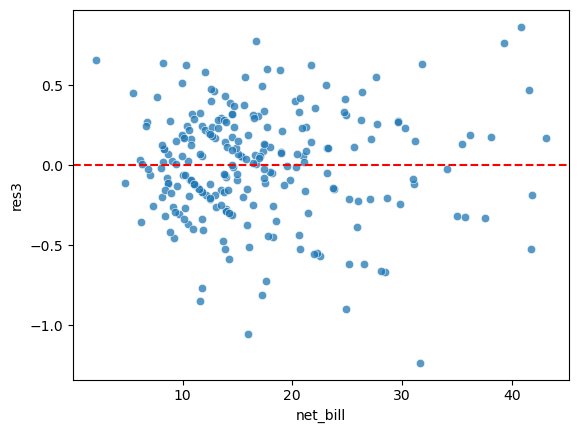

In [25]:
#Análise de resíduo3.
sns.scatterplot(x = 'net_bill', y = 'res3', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [28]:
# Regressão reg4 ('np.log(tip_pct) ~ np.log(net_bill)').

reg4 = smf.ols('np.log(tip_pct) ~ np.log(net_bill)',
               data=tips).fit()

#Criando a variável de resíduo4.
tips['res4'] = reg4.resid

# Sumário reg4.
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     71.57
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           2.65e-15
Time:                        20:16:11   Log-Likelihood:                -80.588
No. Observations:                 242   AIC:                             165.2
Df Residuals:                     240   BIC:                             172.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6285      0.131     -4.780      0.000      -0.887      -0.370
np.log(net_bill)    -0.4027      0.048     -8.460      0.000      -0.496      -0.309
==============================================================================
Omnibus:                        8.926   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.019
Skew:                          -0.406   Prob(JB):                       0.0110
Kurtosis:                       3.485   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Calculo do R² pela correlação (.corr()).
tips['pred4'] = reg4.fittedvalues
r = tips[['tip_pct', 'pred4']].corr().iloc[0,1]
r ** 2

0.22104786698842288

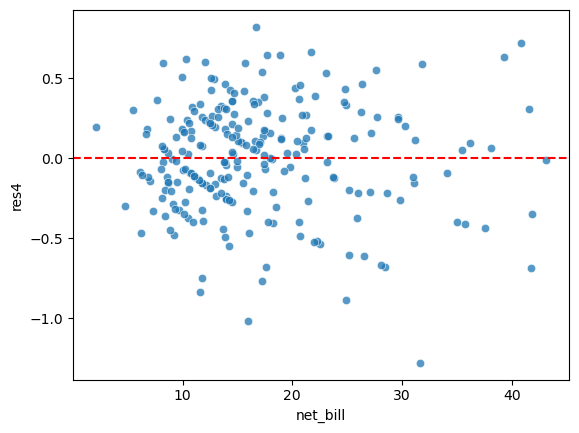

In [32]:
#Análise de resíduo4.
sns.scatterplot(x = 'net_bill', y = 'res4', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  6. qual modelo resultou no melhor ajuste?

### Resposta:
Na minha visão o modelo que resultou no melhor ajuste foi: 
<ol>
<li><b>reg4 ('np.log(tip_pct) ~ np.log(net_bill)'):</b> Teve um R² do OLS maior <b>(0.23)</b> e o calculo do R² feito pela correlação resultou em um número aproximado (0.221). Os Residos ficaram bem distribuidos.</li>
<br>  
<li><b>reg3 ('np.log(tip_pct) ~ net_bill'):</b> Teve um R² do OLS bom <b>(0.225)</b>, porém o calculo do R² feito pela correlação resultou em um número diferente do OLS (0.18). Os Residos ficaram bem distribuidos.</li>
<br>
<li><b>reg1 ('tip_pct ~ np.log(net_bill)'):</b> Teve um R² do OLS bom <b>(0.221)</b>. Os Residos ficaram mais dispersos.</li>
<br>
<li><b>reg2 ('tip_pct ~ net_bill + np.power(net_bill,2)'):</b> Teve um R² do OLS ruim em relação aos outros <b>(0.206)</b>. Os Residos ficaram mais dispersos.</li>
</ol>


Conclusão:
O modelo reg4 ('np.log(tip_pct) ~ np.log(net_bill)') foi o que resultou no melhor ajuste, com o maior R² e resíduos bem distribuídos. Embora o reg3 seja uma boa alternativa, o reg4 se destaca por ser mais consistente e por apresentar melhores resultados nos testes de ajuste e resíduos. Já os modelos reg1 e reg2 apresentaram ajustes mais fracos e resíduos mais dispersos, o que comprometeu o seu desempenho geral.

